SVM은 모델 설정에 따라 비선형, 선형이 가능한 모델로 Kernel에서 설정하여 만들면 됩니다.
SVM은 Support Vector Machine의 약자로서 분류와 회귀 분석에 사용됩니다.
서포트 벡터 머신의 특징이 데이터들의 결정 경계(왼쪽은 참, 오른쪽은 거짓 ) 이런 것처럼 이렇게 분류하여
각 클래스를 구분하는 가장 큰 폭을 갖도록 하는 것이 특징입니다.
결국 이 마진 경계를 찾는 것이 SVM 목적이자 특징입니다.

In [72]:
# 선형 회귀 커널을 탑재한 SVM 모델을 이용한 학습을 진행해보겠습니다
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#평균제곱오차
from sklearn.metrics import mean_squared_error

#데이터들을 불러오기 위한 라이브러리 및 학습과 테스트 파일 구분 function
from sklearn import datasets
from sklearn.model_selection import train_test_split 

#SVM 모델 선언!
from sklearn import svm

In [73]:
#먼저 당뇨병 수치가 들어있는 데이터를 불러옵니다
diabetes=datasets.load_diabetes()

In [74]:
#일단 위 원래 데이터프레임 형식으로 제작하여 학습 및 전처리에 사용하나 샘플 데이터는 일단 바로 가져와 적용하였기에 저도 일단 동일하게 하였습니다.
train_x,test_x,train_y,test_y= train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

In [75]:
#선형이라 kernel에 linear 넣고 해보겠습니다

# 에러 결과 수치가 높아서 매개변수 값을 조정하여 강제로 낮추었습니다.
#일단 오분류에 대한 패널티를 높여서 모델이 복잡하도록 만들어서 학습률을 높이기 위해 결국 이렇게 하여 수치를 3500 아래로 만들었습니다.
svm_model=svm.SVR(kernel='linear', C=100)

In [76]:
#학습 시작!
svm_model.fit(train_x,train_y)

SVR(C=100, kernel='linear')

In [77]:
#학습 한 것을 이용하여 예측 (아까 test_x로 학습 데이터를 분류해놓은 것을 이용)
svm_pre=svm_model.predict(test_x)

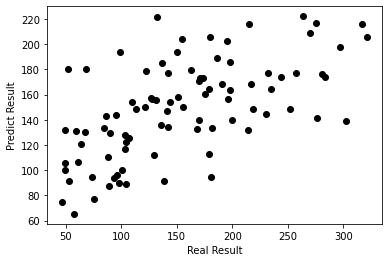

In [78]:
#모델이 예측한 값과 실체 값의 차이를 산점도를 이용하여 나타나였습니다.
plt.scatter(test_y, svm_pre, color='black')
plt.xlabel('Real Result')
plt.ylabel('Predict Result')
plt.show()

In [79]:
#평균 제곱 오차의 테스트 결과값이 test_y, 그리고 선형회귀 예측 모델을 이용해서 학습을 시켜 예상 결과가 담겨있는 res_pre
#이 두 개를 비교하여 평균 제곱 오차를 한 수치를 나타낸 것 입니다.
mse=mean_squared_error(test_y, svm_pre)
rmse=np.sqrt(mse)
rmse

57.53839583022004

In [80]:
#평균 제곱 오차의 합 계산입니다.
n = len(test_y)
res_mse = ((test_y - svm_pre) ** 2).sum() / n
res_mse

3310.6669947150826